- df_raw : 전체 컬럼 
- df_str : 문자타입 컬럼
- df_str_num : 각 카테고리에 숫자를 부여한 컬럼
- df_num : 숫자타입 컬럼

In [2]:
# data 가져오기
df_raw = pd.read_csv('../train.csv')

# 필요한 함수 정의

def isstr(col):
    if col.dtype == 'O':
        return True
    else:
        return False
    
# string type(정확히는 Object 타입) column만 가져오기

strcol_name=[]
i=0
col_names = df_raw.columns

for col in col_names:
    if isstr(df_raw[col]):
        strcol_name.append(i)
    i+=1
    
# SalePrice가 있는 col 포함 시켜주기 = 80번째
strcol_name.append(80)

# str 컬럼의 idx를 가져와서 str type col 만 df_str에 넣어줌.
df_str = df_raw.iloc[:, strcol_name]

# 숫자타입 column만 가져오기

numcol_name=[]
i=0
col_names = df_raw.columns

for col in col_names:
    if isstr(df_raw[col]) == False:
        numcol_name.append(i)
    i+=1

# 숫자타입 컬럼의 idx를 가져와서 숫자타입 col 만 df_num에 넣어줌.
df_num = df_raw.iloc[:, numcol_name]

# df_str 값들을 숫자로 바꿔주기
# Median을 기준으로, Median 기준으로 카테고리를 오름차순해서 숫자로 변환
# 

df_str_num = df_str.copy()

col_names = df_str_num.columns[0:-1]
for col_name in col_names:
    df1 = pd.DataFrame(df_str_num, columns=[col_name,"SalePrice"])  
    df2 = df1.groupby([col_name])["SalePrice"].median().reset_index(name='Median').sort_values('Median').reset_index(drop=True)
    def isgrade(data) :
        for idx in range(len(df2)):
            if data == df2[col_name][idx]:
                return idx+1
    df_str_num[col_name + 'Grade'] = df_str_num[col_name].apply(isgrade)
    
df_str_num = df_str_num.iloc[:,44:]

df_str_num["SalePrice"] = df_str["SalePrice"]


In [3]:
# count NaN
def nan_check(df_raw):
    null_check = df_raw.isnull().sum()
    null_count = pd.DataFrame({'column' : null_check.index, 'NaN' : null_check.values})
    # None 값이 있는 column만 가져옴.
    null_count = null_count.query('NaN > 0')
    return(null_count)

In [4]:
# None 값에 각 컬럼의 Median 값을 넣어줌.
# fill_nan(데이터프레임)

def fill_nan(df):
    col_names = df.columns
    df_new = df.copy()
    for col_name in col_names:
        df_new[col_name] = df_new[col_name].fillna(df_new[col_name].median())
    return df_new

### 원래 숫자 데이터의 none 값 확인

In [5]:
print(nan_check(df_num))
df_num.head()

    NaN       column
2   259  LotFrontage
8     8   MasVnrArea
25   81  GarageYrBlt


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


### none 값에 median을 넣은 df_num_new 데이터프레임 생성 후, nan 값 확인

In [6]:
df_num_new = fill_nan(df_num)
print(nan_check(df_num_new))
df_num_new.head()

Empty DataFrame
Columns: [NaN, column]
Index: []


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


### 상관 계수 확인
#### missing data 처리 전 상관계수

<숫자 데이터>


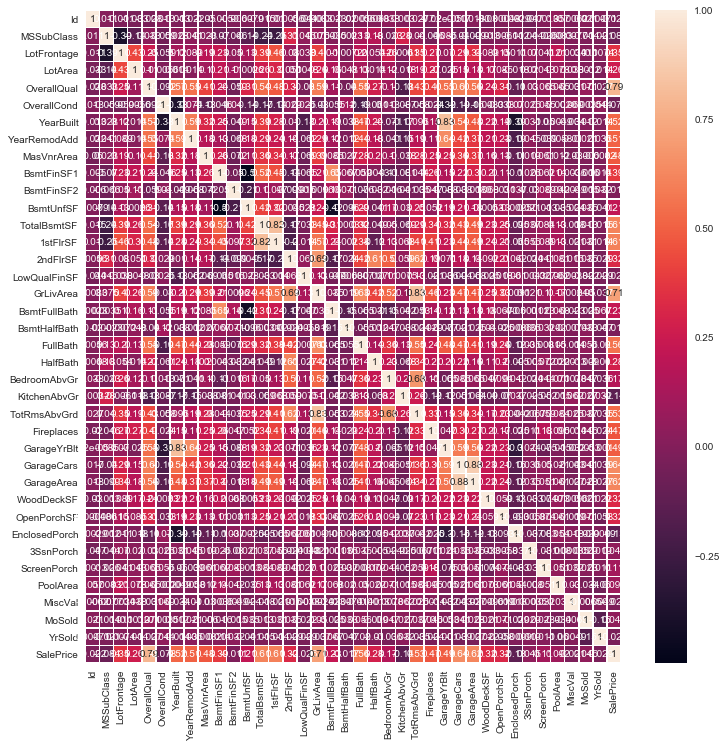

In [7]:
# 숫자 데이터에 대한 상관관계 확인
print("<숫자 데이터>")

heat= df_num.corr()
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(heat.iloc[:, :], annot=True, linewidths=.5, ax=ax)
# plt.show()

# saleprice와의 상관관계만 보기. 내림차순으로. 상위 20개만
res = heat["SalePrice"].sort_values(ascending=False).head(20)
# print(res)

#### missing data 에 median을 넣은 후 상관계수 확인

<숫자 데이터 - missing data 처리 후>


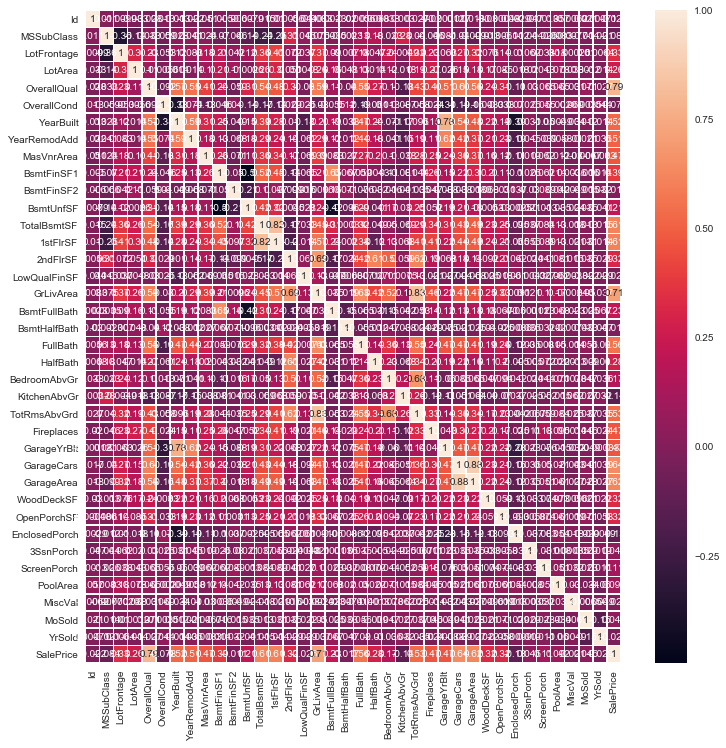

In [8]:
# 숫자 데이터에 대한 상관관계 확인
print("<숫자 데이터 - missing data 처리 후>")

heat= df_num_new.corr()
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(heat.iloc[:, :], annot=True, linewidths=.5, ax=ax)
# plt.show()

# saleprice와의 상관관계만 보기. 내림차순으로. 상위 20개만
res_new = heat["SalePrice"].sort_values(ascending=False).head(20)
# print(res_new)

### 상관계수 비교

In [9]:
# 수정 전후의 상관계수 비교 (상위 20개)
print("<숫자 데이터>")
result = pd.concat([res,res_new],axis=1)
result.columns = (['none 수정전','수정후'])
result['차이'] = result.iloc[:,0] - result.iloc[:,1]
result.sort_values(by=['none 수정전','수정후'], ascending=False) # 내림차순

<숫자 데이터>


,none 수정전,수정후,차이
SalePrice,1.000000,1.000000,0.000000
OverallQual,0.790982,0.790982,0.000000
GrLivArea,0.708624,0.708624,0.000000
GarageCars,0.640409,0.640409,0.000000
GarageArea,0.623431,0.623431,0.000000
TotalBsmtSF,0.613581,0.613581,0.000000
1stFlrSF,0.605852,0.605852,0.000000
FullBath,0.560664,0.560664,0.000000
TotRmsAbvGrd,0.533723,0.533723,0.000000
YearBuilt,0.522897,0.522897,0.000000


### 문자 데이터의 missing data 처리

In [12]:
print(nan_check(df_str_num))
df_str_num.head()

     NaN             column
2   1369         AlleyGrade
17     8    MasVnrTypeGrade
21    37      BsmtQualGrade
22    37      BsmtCondGrade
23    38  BsmtExposureGrade
24    37  BsmtFinType1Grade
25    38  BsmtFinType2Grade
29     1    ElectricalGrade
32   690   FireplaceQuGrade
33    81    GarageTypeGrade
34    81  GarageFinishGrade
35    81    GarageQualGrade
36    81    GarageCondGrade
38  1453        PoolQCGrade
39  1179         FenceGrade
40  1406   MiscFeatureGrade


,MSZoningGrade,StreetGrade,AlleyGrade,LotShapeGrade,LandContourGrade,UtilitiesGrade,LotConfigGrade,LandSlopeGrade,NeighborhoodGrade,Condition1Grade,...,GarageFinishGrade,GarageQualGrade,GarageCondGrade,PavedDriveGrade,PoolQCGrade,FenceGrade,MiscFeatureGrade,SaleTypeGrade,SaleConditionGrade,SalePrice
0,4,2,NaN,1,2,2,1,1,17,4,...,2.0,4.0,5.0,3,NaN,NaN,NaN,6,5,208500
1,4,2,NaN,1,2,2,3,1,20,2,...,2.0,4.0,5.0,3,NaN,NaN,NaN,6,5,181500
2,4,2,NaN,2,2,2,1,1,17,4,...,2.0,4.0,5.0,3,NaN,NaN,NaN,6,5,223500
3,4,2,NaN,2,2,2,2,1,19,4,...,1.0,4.0,5.0,3,NaN,NaN,NaN,6,2,140000
4,4,2,NaN,2,2,2,3,1,24,4,...,2.0,4.0,5.0,3,NaN,NaN,NaN,6,5,250000


In [7]:
df_str_num_new = fill_nan(df_str_num)
print(nan_check(df_str_num_new))
df_str_num_new.head()

Empty DataFrame
Columns: [NaN, column]
Index: []


,MSZoningGrade,StreetGrade,AlleyGrade,LotShapeGrade,LandContourGrade,UtilitiesGrade,LotConfigGrade,LandSlopeGrade,NeighborhoodGrade,Condition1Grade,...,GarageFinishGrade,GarageQualGrade,GarageCondGrade,PavedDriveGrade,PoolQCGrade,FenceGrade,MiscFeatureGrade,SaleTypeGrade,SaleConditionGrade,SalePrice
0,4,2,1.0,1,2,2,1,1,17,4,...,2.0,4.0,5.0,3,2.0,2.0,2.0,6,5,208500
1,4,2,1.0,1,2,2,3,1,20,2,...,2.0,4.0,5.0,3,2.0,2.0,2.0,6,5,181500
2,4,2,1.0,2,2,2,1,1,17,4,...,2.0,4.0,5.0,3,2.0,2.0,2.0,6,5,223500
3,4,2,1.0,2,2,2,2,1,19,4,...,1.0,4.0,5.0,3,2.0,2.0,2.0,6,2,140000
4,4,2,1.0,2,2,2,3,1,24,4,...,2.0,4.0,5.0,3,2.0,2.0,2.0,6,5,250000


### 상관계수 확인

<문자 데이터>


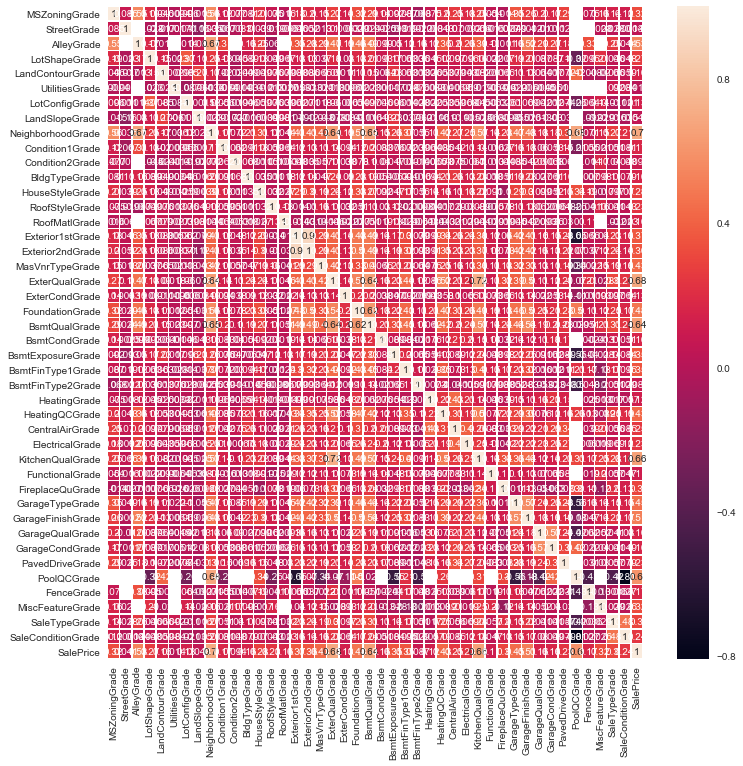

SalePrice            1.000000
NeighborhoodGrade    0.696158
ExterQualGrade       0.682639
KitchenQualGrade     0.659600
BsmtQualGrade        0.644019
PoolQCGrade          0.595229
AlleyGrade           0.534319
GarageFinishGrade    0.513105
FoundationGrade      0.478431
GarageTypeGrade      0.445945
MasVnrTypeGrade      0.429020
HeatingQCGrade       0.427649
Exterior1stGrade     0.371018
Exterior2ndGrade     0.362052
BsmtFinType1Grade    0.354137
BsmtExposureGrade    0.352958
MSZoningGrade        0.324610
MiscFeatureGrade     0.322456
SaleTypeGrade        0.297769
FireplaceQuGrade     0.295794
Name: SalePrice, dtype: float64


In [14]:
# 문자 데이터에 대한 상관관계 확인 - 숫자로 치환해준 dataframe에 대해 진행
print("<문자 데이터>")

heat= df_str_num.corr()
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(heat.iloc[:, :], annot=True, linewidths=.5, ax=ax)
plt.show()

# saleprice와의 상관관계만 보기. 내림차순으로. 상위 20개만
res_str_num = heat["SalePrice"].sort_values(ascending=False).head(20)
print(res_str_num)

<문자 데이터 - missing data 처리 후>


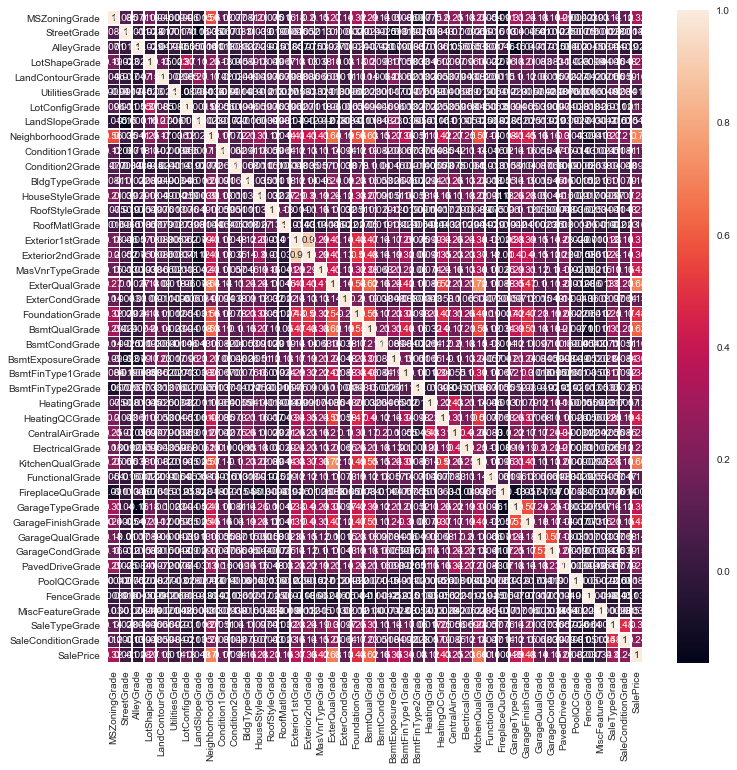

SalePrice             1.000000
NeighborhoodGrade     0.696158
ExterQualGrade        0.682639
KitchenQualGrade      0.659600
BsmtQualGrade         0.617356
GarageFinishGrade     0.482754
FoundationGrade       0.478431
HeatingQCGrade        0.427649
MasVnrTypeGrade       0.423697
GarageTypeGrade       0.394855
Exterior1stGrade      0.371018
Exterior2ndGrade      0.362052
BsmtExposureGrade     0.361863
BsmtFinType1Grade     0.339591
MSZoningGrade         0.324610
SaleTypeGrade         0.297769
HouseStyleGrade       0.276306
LotShapeGrade         0.265699
CentralAirGrade       0.251328
SaleConditionGrade    0.238111
Name: SalePrice, dtype: float64


In [12]:
# 문자 데이터에 대한 상관관계 확인 - 숫자로 치환해준 dataframe에 대해 진행
print("<문자 데이터 - missing data 처리 후>")

heat= df_str_num_new.corr()
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(heat.iloc[:, :], annot=True, linewidths=.5, ax=ax)
plt.show()

# saleprice와의 상관관계만 보기. 내림차순으로. 상위 20개만
res_str_num_new = heat["SalePrice"].sort_values(ascending=False).head(20)
print(res_str_num_new)

### 상관계수 비교

In [13]:
# 수정 전후의 상관계수 비교 (상위 10개)
print("<문자 데이터>")
result_str = pd.concat([res_str_num[0:10],res_str_num_new[0:10]],axis=1)
result_str.columns = (['none 수정전','수정후'])
result_str['차이'] = result_str.iloc[:,0] - result_str.iloc[:,1]
result_str.sort_values(by=['none 수정전','수정후'], ascending=False) # 내림차순

<문자 데이터>


,none 수정전,수정후,차이
SalePrice,1.000000,1.000000,0.000000
NeighborhoodGrade,0.696158,0.696158,0.000000
ExterQualGrade,0.682639,0.682639,0.000000
KitchenQualGrade,0.659600,0.659600,0.000000
BsmtQualGrade,0.644019,0.617356,0.026663
PoolQCGrade,0.595229,NaN,NaN
AlleyGrade,0.534319,NaN,NaN
GarageFinishGrade,0.513105,0.482754,0.030351
FoundationGrade,0.478431,0.478431,0.000000
GarageTypeGrade,0.445945,0.394855,0.051090


# w 값

In [8]:
x_col_str = ['Neighborhood','ExterQual','KitchenQual','BsmtQual']
x_col_num = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt']
x_col_str = [ i + "Grade" for i in x_col_str ]
   
y_col = ['SalePrice']
X_str = pd.DataFrame(df_str_num_new, columns=x_col_str)
X_num = pd.DataFrame(df_num_new, columns=x_col_num)
X = pd.concat([X_str, X_num], axis=1)
y = pd.DataFrame(df_raw, columns=y_col)

In [9]:
X1 = X.iloc[:,-1].reshape([1460,1])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [10]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

In [11]:
w

array([[ 2.34092814e+03],
       [ 7.40058789e+03],
       [ 1.28790427e+04],
       [ 1.21240470e+04],
       [ 1.15960308e+04],
       [ 4.78346382e+01],
       [ 6.97160878e+03],
       [ 1.22264228e+01],
       [ 1.93845983e+01],
       [ 8.79870966e+00],
       [-9.72251104e+03],
       [ 9.41823846e+02],
       [-5.76259483e+01]])

In [20]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X1.T, X1)), X1.T), y)

In [21]:
w

array([[92.08015252]])

In [40]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X_num.T, X_num)), X_num.T), y)

In [41]:
w

array([[ 2.38607073e+04],
       [ 4.47135600e+01],
       [ 1.50397234e+04],
       [ 1.58485178e+01],
       [ 2.53021122e+01],
       [ 1.00544657e+01],
       [ 2.68648076e+03],
       [-1.30237038e+03],
       [-5.09914145e+01]])

In [45]:
X2 = X_num.iloc[:,0:4]

In [43]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X2.T, X2)), X2.T), y)
w

array([[11836.74706492],
       [   46.08793667],
       [24697.3931324 ]])

In [46]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X2.T, X2)), X2.T), y)
w

array([[11775.98624372],
       [   44.88554364],
       [13600.46643867],
       [   46.05100156]])